# Week 1 - karatsuba Method

**Coding Question:** What's the product of the following two 64-digit numbers?

3141592653589793238462643383279502884197169399375105820974944592

2718281828459045235360287471352662497757247093699959574966967627

In [97]:
import math
import numpy as np
import pandas as pd
import random
import time
import copy
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import seaborn as sns
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', 500)
%matplotlib inline 
%config InlineBackend.figure_format='retina'
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [92]:


def splits_digits(num, split_n):
    '''This function finds high and low points for a 
    division'''
    high, low = divmod(num, 10**split_n)
    return high, low

def get_integer_digits_fast(n):
    # This is a fast approach to get the digits number
    if n == 0:
        return 1
    else:
        return int(math.log10(n))+1
    
def get_integer_digits_slow(n):
    # Slower approach for getting integer digits nunber
    return len(str(n))

def karatsuba(num_1, num_2):
    if (num_1 < 10) & (num_2 < 10):
        return num_1 * num_2
    split_n = max(get_integer_digits_fast(num_1), get_integer_digits_fast(num_2)) // 2
    a, b = splits_digits(num_1, split_n)
    c, d = splits_digits(num_2, split_n)
    comp1 = karatsuba(a, c)
    comp2 = karatsuba(b, d)
    comp3 = karatsuba(a + b, c + d)
    return comp1 * 10**(2 * split_n) + (comp3 - comp1 - comp2) * 10**(split_n) + comp2
    
num_1 = 3141592653589793238462643383279502884197169399375105820974944592
num_2 = 2718281828459045235360287471352662497757247093699959574966967627
print(karatsuba(num_1, num_2) == num_1 * num_2)

True


In [93]:
# Plotting O(n) vs. O(n^2) vs. O(n^1.585)
result = []
rep = 1000
max_digit = 15
random_nums_1 = [0] * rep
random_nums_2 = [0] * rep
for i in range(max_digit):
    low_lim = 10**i
    high_lim = 10**(i + 1) - 1
    for j in range(rep):
        random_nums_1[j] = random.randint(low_lim, high_lim)
        random_nums_2[j] = random.randint(low_lim, high_lim)
    t0 = time.time()
    for j in range(rep):
        karatsuba(random_nums_1[j], random_nums_2[j])
    t1 = time.time()
    result.append(t1 - t0)
    print("Time taken for {0:s} repetion of {1:02d} digits: {2:1.5f}".format(str(rep), i, t1 - t0))

Time taken for 1000 repetion of 00 digits: 0.00054
Time taken for 1000 repetion of 01 digits: 0.01198
Time taken for 1000 repetion of 02 digits: 0.02897
Time taken for 1000 repetion of 03 digits: 0.04543
Time taken for 1000 repetion of 04 digits: 0.06995
Time taken for 1000 repetion of 05 digits: 0.08844
Time taken for 1000 repetion of 06 digits: 0.10933
Time taken for 1000 repetion of 07 digits: 0.12007
Time taken for 1000 repetion of 08 digits: 0.20871
Time taken for 1000 repetion of 09 digits: 0.21432
Time taken for 1000 repetion of 10 digits: 0.22980
Time taken for 1000 repetion of 11 digits: 0.24978
Time taken for 1000 repetion of 12 digits: 0.29517
Time taken for 1000 repetion of 13 digits: 0.33784
Time taken for 1000 repetion of 14 digits: 0.35740


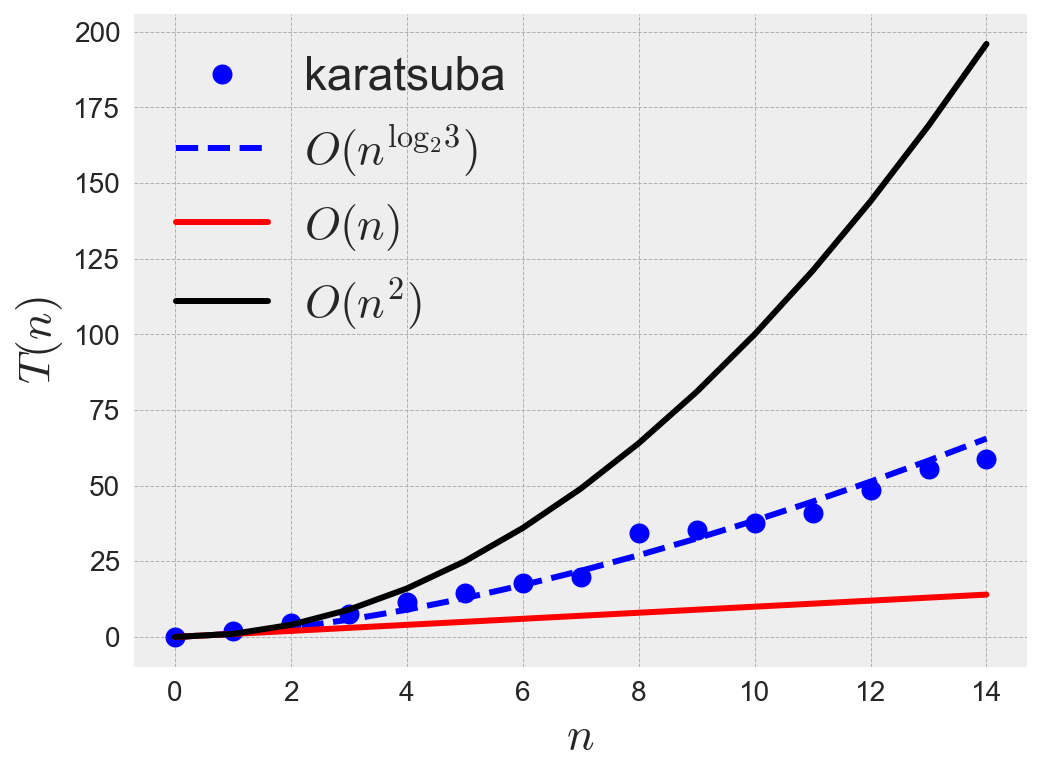

In [104]:
coef = np.log2(3)
ratio_for_plot = (1/4)*(result[3] / 3**coef + result[7] / 7**coef + + result[10] / 10**coef + result[-1] / max_digit**coef)
plt.plot(np.array(result)/ratio_for_plot, "bo", label="karatsuba", markersize=10)
plt.plot([i**1.585 for i in range(max_digit)], "b--", label="$O(n^{\log_23})$", linewidth=3)
plt.plot(range(max_digit), "r", label="$O(n)$", linewidth=3)
plt.plot([i**2 for i in range(max_digit)], "k", label="$O(n^{2})$", linewidth=3)
plt.legend(prop={'size': 23})
plt.xlabel('$n$', fontsize=23)
plt.ylabel('$T(n)$', fontsize=23)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Week 2 - Number of Inversions

In [95]:
# Reading the file
numbers = []
with open('inversions.txt') as f:
    for line in f:
        data = line.split()
        numbers.append(int(data[0]))

In [96]:
def combining_sorted_arrays(left, right):
    n_left = len(left)
    n_right = len(right)
    result = [0] * (n_left + n_right)
    inversions = 0
    n_result = len(result)
    i, j, k = 0, 0, 0
    while ((i < n_left) & (j < n_right) & (k < n_result)):
        if left[i] <= right[j]:
            result[k] = left[i]
            i += 1
        else:
            result[k] = right[j]
            inversions += n_left - i
            # print(inversions)
            j += 1
        k += 1
    while (i < n_left):
        result[k] = left[i]
        i += 1
        k += 1
    while (j < n_right):
        result[k] = right[j]
        j += 1
        k += 1
    return result, inversions
            
    
    
def inversion_counter(d):
    n = len(d)
    if n <= 1:
        return d, 0
    mid = n // 2
    left_sorted, inv_left = inversion_counter(d[:mid])
    # print(left_sorted, inv_left)
    right_sorted, inv_right = inversion_counter(d[mid:])
    # print(right_sorted, inv_right)
    result, inversions = combining_sorted_arrays(left_sorted, right_sorted)
    return result, inversions + inv_left + inv_right

In [97]:
_, inv_final = inversion_counter(numbers)
inv_final

2407905288

# Week 3 - Quick Sort

In [98]:
# Reading the file
import numpy as np
import copy
numbers = []
with open('quicksort.txt') as f:
    for line in f:
        data = line.split()
        numbers.append(int(data[0]))
numbers2 = copy.copy(numbers)
numbers3 = copy.copy(numbers)

In [99]:
def partion_pivot_first(array, low, high):
    i = low + 1
    pivot = array[low]
    
    for j in range(low + 1, high + 1):
        if array[j] < pivot:
            array[i], array[j] = array[j], array[i]
            i += 1
    array[i - 1], array[low] = array[low], array[i - 1]
    return i - 1, high - low

def changes_in_array(array, low, high, pivot_method):
    if pivot_method == "first":
        return
    elif pivot_method == "last":
        array[low], array[high] = array[high], array[low]
        return
    elif pivot_method == "median_of_three":
        mid = low + (high - low) // 2
        tmp = np.median([array[low], array[high],array[mid]])
        if tmp == array[high]:
            array[low], array[high] = array[high], array[low]
        elif tmp == array[mid]:
            array[low], array[mid] = array[mid], array[low] 
        return
             

def quick_sort_helper(array, low, high, pivot_method="first"):
    if low < high:
        changes_in_array(array, low, high, pivot_method)         
        piv_index, comparison_counter = partion_pivot_first(array, low, high)
        left_comp = quick_sort_helper(array, low, piv_index - 1, pivot_method)
        right_comp = quick_sort_helper(array, piv_index + 1, high, pivot_method)
        return comparison_counter + left_comp + right_comp
    else:
        return 0

def quick_sort(array, pivot_method="first"):
    n = len(array)
    comparisons = quick_sort_helper(array, 0 , n-1, pivot_method=pivot_method)
    return comparisons

In [100]:
# Simple Test Case
arr = [10, 7, 8, 9, 1, 5]
comp = quick_sort(arr)
print(comp)
print(arr)

11
[1, 5, 7, 8, 9, 10]


In [101]:
# Pivot is the first element
comp = quick_sort(numbers, "first")
print(comp)

162085


In [102]:
# pivot is the last element
comp = quick_sort(numbers2, "last")
print(comp)

164123


In [103]:
comp = quick_sort(numbers3, "median_of_three")
print(comp)

138382


# Week 4 - Karger method for Min Cuts

In [124]:
# Reading the file
graph = {}
graph_edges = {}
with open("KargerMinCut.txt") as f:
    for line in f:
        data = [int(node) for node in line.split()]
        graph[data[0]] = data[1:]
        graph_edges[data[0]] = len(data) - 1

In [125]:
def find_random_edge(graph_dic, graph_edges_dic):
    """This function goes through the nodes randomly (weighted by nodes connection) and
    then does another random choosing to get the edge. The output will be nodes making 
    one random edge"""
    nodes, node_links = zip(*graph_edges_dic.items())
    weights_sum = float(sum(node_links))
    p = [weight / weights_sum for weight in node_links] #n ormalizing probabilities
    n1 = np.random.choice(nodes, size=1, p=p)[0]
    n2 = np.random.choice(graph_dic[n1], size=1)[0]
    return n1, n2

def karger_one_run(graph_dic, graph_edges_dic):
    """This function returns the min cut number of the graph. This number is 
    p = 2/(n(n-1)) inaccurate!"""
    while len(graph_dic) > 2:
        n1, n2 = find_random_edge(graph_dic, graph_edges_dic)
        while n2 in graph_dic[n1]:
            graph_dic[n1].remove(n2)
        while n1 in graph_dic[n2]:
            graph_dic[n2].remove(n1)
        graph_dic[n1].extend(graph_dic[n2])
        for node in graph_dic[n2]:
            graph_dic[node].remove(n2)
            graph_dic[node].append(n1)
        del graph_dic[n2]
        del graph_edges_dic[n2]
        graph_edges_dic[n1] = len(graph_dic[n1])
    remaining_nodes = list(graph_dic.keys())
    if len(graph_dic[remaining_nodes[0]]) != len(graph_dic[remaining_nodes[1]]):
        raise NameError('Smoething went wrong! You should not see this message!')
    else:
        return len(graph_dic[remaining_nodes[0]])
        
    
def karger(graph, graph_edges, iterations=1000):
    
    min_cuts = []
    for i in range(iterations):
        if i % 100 == 0:
            print("Repeating {0:04d} from {1:04d}".format(i, iterations))
        graph_dic = copy.deepcopy(graph)
        graph_edges_dic = copy.deepcopy(graph_edges)
        min_cut_one = karger_one_run(graph_dic, graph_edges_dic)
        min_cuts.append(min_cut_one)
    return min(min_cuts), min_cuts

In [126]:
final_result, all_results = karger(graph, graph_edges, iterations=3000)

Repeating 0000 from 3000
Repeating 0100 from 3000
Repeating 0200 from 3000
Repeating 0300 from 3000
Repeating 0400 from 3000
Repeating 0500 from 3000
Repeating 0600 from 3000
Repeating 0700 from 3000
Repeating 0800 from 3000
Repeating 0900 from 3000
Repeating 1000 from 3000
Repeating 1100 from 3000
Repeating 1200 from 3000
Repeating 1300 from 3000
Repeating 1400 from 3000
Repeating 1500 from 3000
Repeating 1600 from 3000
Repeating 1700 from 3000
Repeating 1800 from 3000
Repeating 1900 from 3000
Repeating 2000 from 3000
Repeating 2100 from 3000
Repeating 2200 from 3000
Repeating 2300 from 3000
Repeating 2400 from 3000
Repeating 2500 from 3000
Repeating 2600 from 3000
Repeating 2700 from 3000
Repeating 2800 from 3000
Repeating 2900 from 3000


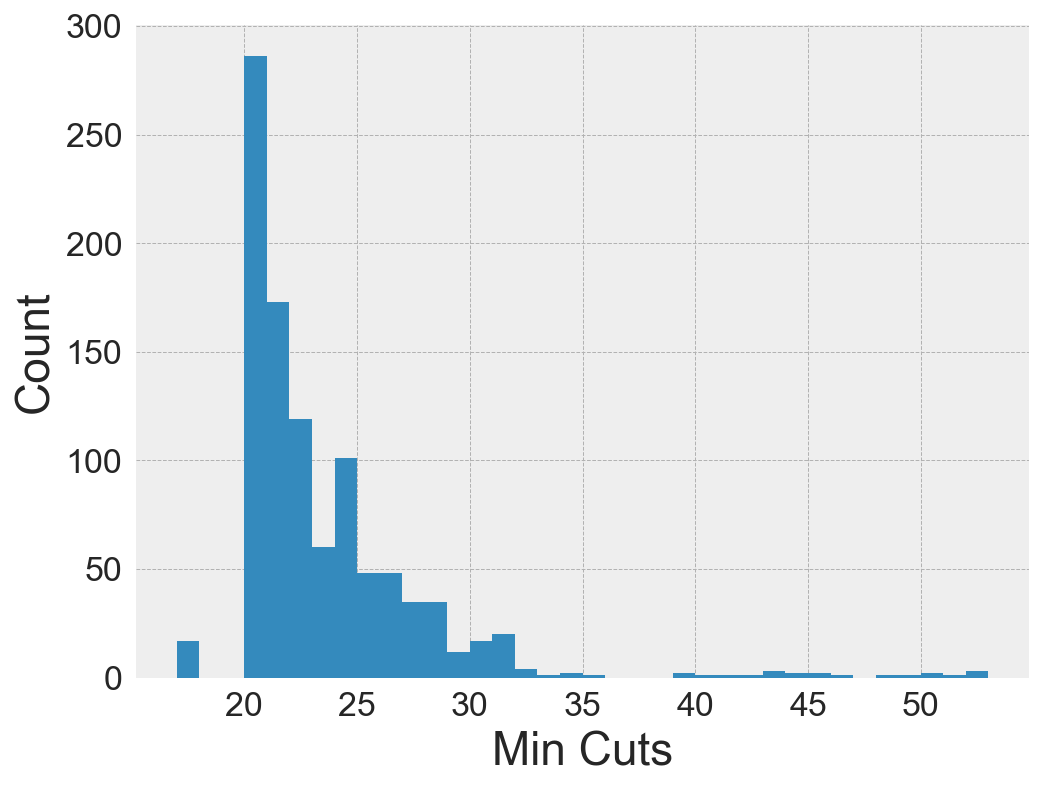

In [121]:
"""Technically, we should repeat this n**2 x ln(n) times to make sure there is 1/n chance we don't get the absolute minimum. 
Here, n = 200 and we should do 200x200xln(200) ~ 211932 times!!! That is a lot of iterations! Instead I am doing just 1000 
iterartions. There is exp(-1000/200**2) probability ~ 0.97 of all the time not getting the minimum cut! Yet, I am getting 17 
which is the correct answer!!!"""
plt.hist(all_results,bins=max(all_results) - min(all_results))
plt.xlabel("Min Cuts", fontsize=23)
plt.ylabel("Count", fontsize=23)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

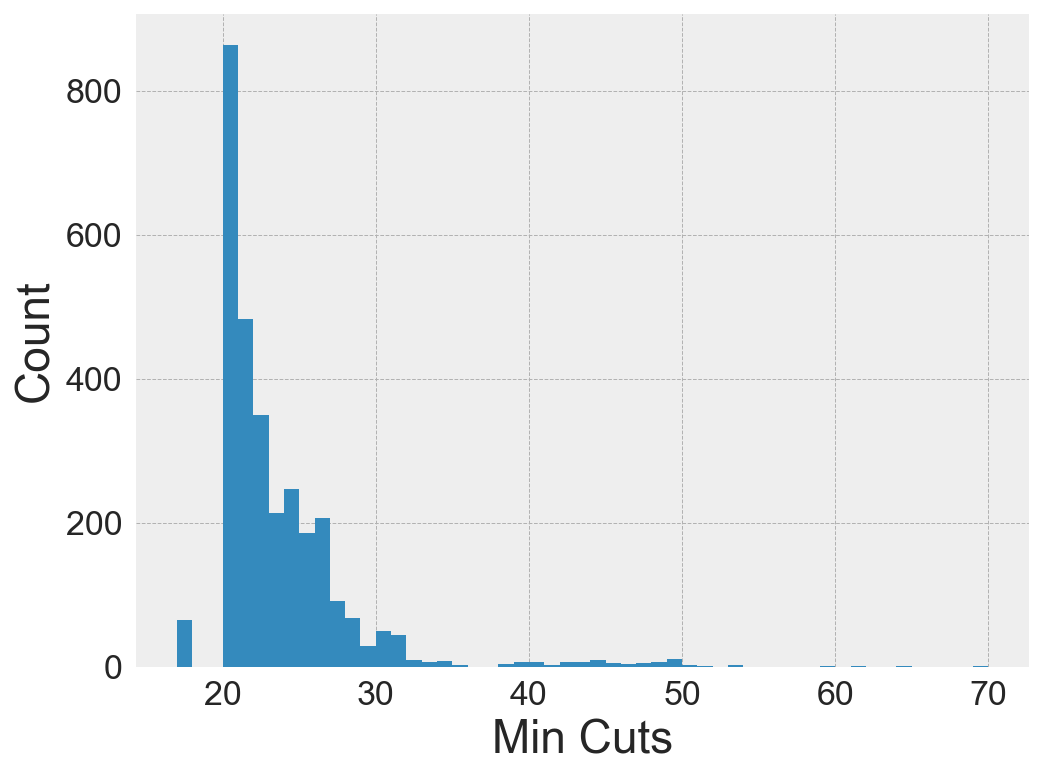

In [127]:
"""Technically, we should repeat this n**2 x ln(n) times to make sure there is 1/n chance we don't get the absolute minimum. 
Here, n = 200 and we should do 200x200xln(200) ~ 211932 times!!! That is a lot of iterations! Instead I am doing just 1000 
iterartions. There is exp(-1000/200**2) probability ~ 0.97 of all the time not getting the minimum cut! Yet, I am getting 17 
which is the correct answer!!!"""
a = plt.hist(all_results,bins=max(all_results) - min(all_results))
plt.xlabel("Min Cuts", fontsize=23)
plt.ylabel("Count", fontsize=23)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [128]:
a

(array([  65.,    0.,    0.,  863.,  483.,  350.,  214.,  247.,  185.,
         206.,   91.,   67.,   29.,   50.,   44.,    9.,    7.,    8.,
           2.,    0.,    0.,    3.,    6.,    7.,    2.,    6.,    7.,
           9.,    5.,    4.,    5.,    7.,   10.,    2.,    1.,    0.,
           2.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    1.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    1.]),
 array([ 17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,
         28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,
         39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,
         50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
         61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.]),
 <a list of 53 Patch objects>)